# Lecture 5 : PyTorch

## previously

In [1]:
from random import Random
import numpy as np
from matplotlib.pyplot import figure
from math import sqrt
from time import monotonic #time and increasing
SEED = 5

In [2]:
def gen_rand_pts(N=1000):
    """
    returns 2 lists where the first one contains the x-coordinates of the points generated randomly,
    and the second one contains the y-coordinates of the points generated randomly
    :param N: (int, optional) default = 1000,
        number of random generated points
    :return: tuple of 2 lists
    """
    if N<=0:
        raise ValueError("Wrong value for N")
    rand_gen = Random(x=SEED)
    return (
        [rand_gen.uniform(a=0, b=1) for _ in range(N)],
        [rand_gen.uniform(a=0, b=1) for _ in range(N)]
    )

In [3]:
def loss( x_p, y_p, batch_x, batch_y):
    """
takes the data set and the initial guess and returns the evaluation of our loss function
:param data_x:(list of floats) : x-coordinate of the data point for the training data
:param data_y:(list of floats) : y-coordinate of the data point for the training data
:param x_p:(float) : x-coordinate of the data point for the initial guess
:param y_p:(float) : y-coordinate of the data point for the initial guess
:return: loss (float): The root mean squared distance between
    the point (x_p, y_p) and the data points
"""
    n_inv = 1/len(batch_x)
    return n_inv * sum(
        [ ((x_i-x_p)**2 + (y_i-y_p)**2)**0.5 for x_i, y_i in zip(batch_x, batch_y)]
    )

In [4]:
data_x, data_y = gen_rand_pts()
STEP = 0.01
MESH_SIZE = 300
x_mesh = [-1+i*STEP for i in range(MESH_SIZE)]
y_mesh = [-1+i*STEP for i in range(MESH_SIZE)]
start_time = monotonic()
loss_mesh = [
    [loss(x_curr, y_curr, data_x, data_y) for x_curr in x_mesh]
    for y_curr in y_mesh
]
print(f"time is {(monotonic() - start_time)*1000:0.2f} Us")

time is 39281.00 Us


<bound method Figure.show of <Figure size 720x720 with 1 Axes>>

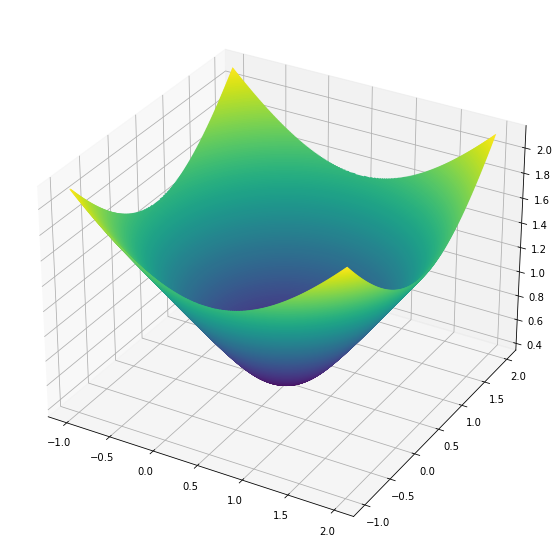

In [5]:
fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")
ax.contour(x_mesh, y_mesh, loss_mesh, levels=500)
fig.show

## updates

In [6]:
import torch
data_torch = torch.tensor([data_x, data_y])#create ndArray that has gradient calculation
print(f"shape before transposing {data_torch.shape}") #dimension 2*1000
"""
we want each row represents a data point while
each column represents a variable
so we transpose the matrix in order to follow this convension
"""
print(f"data pointer of the data_torch {data_torch.data_ptr()}")
data_torch = data_torch.t() #transpose the matrix
print(f"shape after transposing {data_torch.shape}")

shape before transposing torch.Size([2, 1000])
data pointer of the data_torch 2532617224384
shape after transposing torch.Size([1000, 2])


In [7]:
# we want to see how the data is stored by torch
print(f"storage of data_torch {data_torch.storage()}")
print(f"data pointer of the data_torch {data_torch.data_ptr()}")

storage of data_torch  0.6229016780853271
 0.7417870163917542
 0.7951935529708862
 0.9424502849578857
 0.7398985624313354
 0.9223250150680542
 0.029005227610468864
 0.4656226634979248
 0.9433566927909851
 0.6489745378494263
 0.9009004831314087
 0.11320596188306808
 0.4690690338611603
 0.2465728372335434
 0.5437608361244202
 0.573941171169281
 0.013114189729094505
 0.2167298048734665
 0.279482364654541
 0.9163453578948975
 0.7657254338264465
 0.15960420668125153
 0.7971469759941101
 0.13876742124557495
 0.6174525022506714
 0.12669923901557922
 0.0017748621758073568
 0.871404767036438
 0.20945638418197632
 0.21548116207122803
 0.9824211001396179
 0.8724077939987183
 0.289305180311203
 0.9614779949188232
 0.5392234921455383
 0.6778304576873779
 0.2047795206308365
 0.9409760236740112
 0.6906419396400452
 0.9665642976760864
 0.8937416672706604
 0.2987889051437378
 0.36118993163108826
 0.165956050157547
 0.14570191502571106
 0.06513971090316772
 0.301359087228775
 0.6031100153923035
 0.00338

In PyTorch, a tensor is represented as a combination of metadata (such as the tensor shape, data type, and strides) and a contiguous block of memory that holds the actual tensor data. When you transpose a tensor, the metadata is updated to reflect the new shape, but the underlying data in memory is not changed.


In [8]:
print(f"strides : {data_torch.stride(0), data_torch.stride(1)}")
# broadcasting
data_torch = data_torch.broadcast_to(size=(100,1000,2))
print(f"shape after broadcasting{data_torch.shape}")
print(f"stride: {data_torch.stride(0), data_torch.stride(1), data_torch.stride(2)}")

strides : (1, 1000)
shape after broadcastingtorch.Size([100, 1000, 2])
stride: (0, 1, 1000)


In PyTorch, broadcasting is a technique that allows operations to be performed between tensors of different shapes, by implicitly expanding or replicating the values of the smaller tensor to match the shape of the larger tensor. Broadcasting is important in deep learning because it enables efficient computations on batches of data, without the need to manually reshape tensors.

To perform broadcasting in PyTorch, you can use the following rules:

If the two tensors have the same shape, no broadcasting is needed and the operation can be performed directly.

If the two tensors have different shapes, PyTorch will try to align their shapes by adding new dimensions to the smaller tensor. These new dimensions are usually added on the left side of the tensor, so that the shapes match from the right side.

If a tensor has a size of 1 along a particular dimension, it can be broadcasted along that dimension to match the size of the other tensor. This is repeated for all dimensions until the shapes match.

In PyTorch, two tensors can only be broadcasted if their shapes are compatible. The shapes are considered compatible if they are equal along all dimensions, or if one of the tensors has a dimension of size 1, which can be broadcasted to match the size of the corresponding dimension of the other tensor.

If the shapes of the tensors are not compatible, PyTorch will raise a RuntimeError with a message that says "The size of tensor X must match the size of tensor Y or be a single element." This error message indicates that the tensors cannot be broadcasted because their shapes do not match and none of the dimensions have a size of 1.

For example, consider the following code:

In [9]:
a= torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([10, 20, 30])
c = a + b

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

This error message indicates that the shapes of a and b are not compatible for broadcasting, because they have different sizes along the first dimension and neither dimension has a size of 1.

To fix this error, you would need to reshape b to have a shape that is compatible with the shape of a, for example by adding a new dimension with size 1:

In [10]:
a+b[:2].reshape(2,1)

tensor([[11, 12],
        [23, 24]])

In [11]:
x_p, y_p = 5., 5.
old_loss = loss(x_p,y_p, data_x, data_y)
print(f"old loss {old_loss}")

old loss 6.382888159785493


In [12]:
data_torch1 = torch.tensor([data_x, data_y])
data_torch1 = data_torch1.t()
print(f"shape : {data_torch1.shape}")
pnt = torch.tensor([5.,5.])
print(f"shape pnt : {pnt.shape}")
#diff
res = data_torch1-pnt
#print(res)
# square
res = res**2
#print(res)
#add
# we add the columns i.e. dimension 1
res = res.sum(dim=1)
#print(res.shape)
#sqrt
res = res.sqrt()
#print(res.shape)
# sum across all points
res = res.sum(dim=0)/data_torch1.shape[0]
print(res)

shape : torch.Size([1000, 2])
shape pnt : torch.Size([2])
tensor(6.3829)


## comparing calculating loss mesh using numerical computation i.e

In [13]:
torch_loss_fn = lambda pnt, data: torch.sqrt(((pnt-data)**2).sum(dim=1)).sum(dim=0)/data.shape[0]
torch_data2 = torch.tensor([data_x,data_y]).t()
STEP=0.01
MESH_SIZE = 300
x_mesh = [-1+i*STEP for i in range(MESH_SIZE)]
y_mesh = [-1+i*STEP for i in range(MESH_SIZE)]
start_time = monotonic()
loss_mesh = [
    [torch_loss_fn(torch.tensor([x_curr, y_curr]), torch_data2) for x_curr in x_mesh
     for y_curr in y_mesh]
]
print((monotonic()-start_time)*1000)

4000.0


## Speeding things up

In [14]:
torch_loss_fn_faster = lambda pnt, data : torch.sqrt(
    (
        (pnt-data.repeat((pnt.shape[0],1,1)).view(-1,pnt.shape[0],2))**2
    )\
    .sum(dim=-1)).sum(dim=0)/data.shape[0]

The given code defines a PyTorch loss function using a lambda expression. The function takes in two inputs, pnt and data, which are expected to be PyTorch tensors.

The purpose of the loss function appears to be to compute the root-mean-square error (RMSE) between each point in pnt and each point in data. This is achieved by first computing the Euclidean distance between each pair of points using the formula:
"""
((pnt - data.repeat((pnt.shape[0],1,1)).view(-1,pnt.shape[0],2)) ** 2).sum(dim=-1)
"""
This code computes the difference between each pair of points in pnt and data, and squares each element of the resulting tensor. The resulting tensor has shape (pnt.shape[0] * data.shape[0], 2), where the first dimension corresponds to all possible pairs of points, and the second dimension contains the squared differences in the x and y coordinates.

The sum(dim=-1) method call then sums these squared differences across the second dimension, resulting in a tensor of shape (pnt.shape[0] * data.shape[0],), which contains the squared Euclidean distances between each pair of points.

Finally, the function takes the square root of this tensor using torch.sqrt, and computes the mean RMSE across all points in pnt using the formula:
"""
.sum(dim=0) / data.shape[0]

"""
Here, the sum(dim=0) method call sums the RMSE across all points in pnt, and the / data.shape[0] term computes the mean RMSE by dividing by the number of points in data.


### pytorch, repeat(), view()

The repeat() method in PyTorch is used to create a tensor by repeating the elements of a given tensor along a specified axis. The method takes a tuple of integers as an argument, where each integer specifies the number of times to repeat the tensor along the corresponding axis.

In the provided code, data.repeat((pnt.shape[0], 1, 1)) creates a new tensor by repeating data pnt.shape[0] times along the first axis, and only once along the remaining axes (i.e., the second and third axes). The resulting tensor has shape (pnt.shape[0]*data.shape[0], 2), which is a flattened version of a 3D tensor of shape (pnt.shape[0], data.shape[0], 2).

The purpose of repeating data pnt.shape[0] times along the first axis is to allow for a computation of the difference between each point in pnt and each point in data. This is achieved by subtracting each point in data from each point in pnt, where the repeated data tensor allows for broadcasting to perform this computation across all pairs of points.

To achieve this, the repeated data tensor is then reshaped to the shape (pnt.shape[0], data.shape[0], 2) using the view() method. This allows each point in pnt to be subtracted from each point in data, resulting in a tensor of shape (pnt.shape[0], data.shape[0], 2) that contains the differences between all pairs of points.

In [15]:
m = torch.tensor([[1, 2], [3, 4]])

# Repeat the tensor along the first dimension 3 times and along the second dimension 2 times
mn = m.repeat((3, 2))

print(m)
# Output: tensor([[1, 2],
#                 [3, 4]])

print(mn)
# Output: tensor([[1, 2],
#                 [3, 4],
#                 [1, 2],
#                 [3, 4],
#                 [1, 2],
#                 [3, 4],
#                 [1, 2],
#                 [3, 4],
#                 [1, 2],
#                 [3, 4]])
"""
    In this example, the input tensor x has shape (2, 2). The repeat() function is called with the argument (3, 2), which means that the tensor should be repeated 3 times along the first dimension and 2 times along the second dimension. The resulting tensor y has shape (6, 4), which is the result of multiplying the original shape (2, 2) by (3, 2).

Note that the repeat() function creates a new tensor, so any changes made to the new tensor will not affect the original tensor. Also, repeating a tensor can lead to a large increase in memory usage, so it's important to use this function with care.
"""

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2, 1, 2],
        [3, 4, 3, 4],
        [1, 2, 1, 2],
        [3, 4, 3, 4],
        [1, 2, 1, 2],
        [3, 4, 3, 4]])


"\n    In this example, the input tensor x has shape (2, 2). The repeat() function is called with the argument (3, 2), which means that the tensor should be repeated 3 times along the first dimension and 2 times along the second dimension. The resulting tensor y has shape (6, 4), which is the result of multiplying the original shape (2, 2) by (3, 2).\n\nNote that the repeat() function creates a new tensor, so any changes made to the new tensor will not affect the original tensor. Also, repeating a tensor can lead to a large increase in memory usage, so it's important to use this function with care.\n"

In PyTorch, the view() function is used to reshape a tensor. The function returns a new tensor that has the same data as the original tensor, but with a different shape. The new shape must have the same number of elements as the original shape, meaning that the total number of elements in the tensor must remain the same after reshaping.

Here's an example usage of the view() function in PyTorch:

In [16]:
m = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Reshape the tensor to have shape (3, 2)
mm = m.view((3, 2))

print(m)
# Output: tensor([[1, 2, 3],
#                 [4, 5, 6]])

print(mm)
# Output: tensor([[1, 2],
#                 [3, 4],
#                 [5, 6]])
"""In this example, the input tensor x has shape (2, 3). The view() function is called with the argument (3, 2), which means that the tensor should be reshaped to have shape (3, 2). The resulting tensor y has shape (3, 2), which is the new shape we specified.

Note that the view() function creates a new tensor, so any changes made to the new tensor will not affect the original tensor. Also, the function assumes that the underlying data of the tensor is contiguous, meaning that there are no gaps between elements in memory. If the tensor is not contiguous, the view() function may return unexpected results or an error. In this case, the contiguous() function can be used to ensure that the tensor is contiguous before calling view()."""

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2],
        [3, 4],
        [5, 6]])


'In this example, the input tensor x has shape (2, 3). The view() function is called with the argument (3, 2), which means that the tensor should be reshaped to have shape (3, 2). The resulting tensor y has shape (3, 2), which is the new shape we specified.\n\nNote that the view() function creates a new tensor, so any changes made to the new tensor will not affect the original tensor. Also, the function assumes that the underlying data of the tensor is contiguous, meaning that there are no gaps between elements in memory. If the tensor is not contiguous, the view() function may return unexpected results or an error. In this case, the contiguous() function can be used to ensure that the tensor is contiguous before calling view().'

In [17]:
torch_data = torch.tensor([data_x,data_y]).t()
x_0 = torch.linspace(-1,2,300).repeat(1,300).t()
x_1 = torch.linspace(-1,2,300).repeat(300,1).t().reshape(-1,1)
pnts = torch.hstack((x_0, x_1))
start_time = monotonic()
res = torch_loss_fn_faster(pnts, torch_data)
print(f"time after tricks application is {(monotonic()-start_time)*1000}")

time after tricks application is 1187.000000034459


This code defines a PyTorch function called torch_loss_fn_faster that takes in two arguments: pnt and data. pnt is a tensor of shape (n, 2) containing n 2D points, and data is a tensor of shape (m, 2) containing m reference 2D points. The function calculates the Euclidean distance between each point in pnt and all the points in data, and returns the average distance over all points in data.

The first line of the function calculates the squared difference between each pair of points in pnt and all the points in data, using broadcasting to avoid explicit loops. Specifically, it creates a new tensor by repeating data along the first dimension n times, so that it has shape (n, m, 2). It then reshapes this tensor to have shape (-1, m, 2), which stacks the n rows of the tensor on top of each other. The resulting tensor has shape (n * m, 2), which is suitable for computing elementwise differences with pnt.

The squared differences are then calculated using the ** operator, and the sum of squares is computed over the second dimension using the sum() function with dim=-1. This results in a tensor of shape (n, m) containing the squared distances between each point in pnt and all the points in data.

The next line takes the square root of each element in the tensor using the sqrt() function, which results in a tensor of the same shape as before. Finally, the mean distance over all points in data is computed by taking the sum over the first dimension and dividing by data.shape[0], which is the number of rows in data.

The last part of the code uses the torch.linspace() function to create a grid of 2D points. Specifically, it creates two tensors x_0 and x_1 using torch.linspace() that contain 300 equally spaced values between -1 and 2.

x_0 is then repeated 300 times along the second dimension using repeat(), so that it has shape (300, 300). x_1 is also repeated 300 times, but along the first dimension using repeat(), so that it has shape (300, 300). Then, x_1 is reshaped into a tensor of shape (90000, 1) using reshape(), where each row corresponds to a different point along the y-axis of the grid.

Finally, the torch.hstack() function is used to concatenate x_0 and x_1 into a single tensor pnts, which has shape (90000, 2). This tensor contains all the 2D points in the grid, which are passed to torch_loss_fn_faster() along with the torch_data tensor containing the reference points.

The to("cuda") method is called on both tensors to move them to the GPU for faster computation. The time it takes to execute the function is then printed to the console, which gives an indication of how long it takes to compute the distance between all the points in the grid and the reference points on the GPU.

# Lecture 6

## Supervised Learning

### Problem statement :
given the two-moon dataset, build a classifier capable of categorizing
***unseen*** examples as either belonging to one of the moons.

### Mathematical abstraction :
A neural network can be abstracted as a program that numerically
evaluates a mathematical function .The mathematical function ***predict()**
is defined by:<br>
    -an input X belongs to $R^{N}$
    -an output $\hat{Y}$
    -a set of learnable weights : {w1, w2 , ....,$w_{k}$}<br>
in supervised learning training setup, we are given:
    - a training dataset $D$ : a set of examples ${(X_0,Y_0,)...(X_{N-1}, Y_{N-1})}$
    - loss function $C$: loss A differentiable function with a scaler output $loss$ and $Y$ and $\hat{Y}$


#### Encoding Categorical Targets/ Features

Categorical variables can be represented in machine learning using various techniques, including:

One-hot encoding: one-hot encoding transforms categorical variables into binary vectors of zeros and ones. This technique is widely used and is supported by most machine learning frameworks.

Label encoding: Label encoding replaces each category value with an integer value. For example, "red" might be replaced with 0, "green" with 1, and "blue" with 2. While this technique is simple, it can lead to problems if the integer values are given an arbitrary ordering, as this can introduce unwanted biases into the model.

Binary encoding: Binary encoding is similar to one-hot encoding, but instead of using a vector of zeros and ones, it uses a vector of binary digits (zeros and ones). For example, "red" might be represented as 001, "green" as 010, and "blue" as 100. This technique can be more space-efficient than one-hot encoding if the number of categories is large.

Count encoding: Count encoding replaces each category value with the number of times it appears in the dataset. This technique can be useful when the frequency of a category is related to the target variable.

Target encoding: Target encoding replaces each category value with the mean (or some other statistic) of the target variable for that category. This technique can be useful when the target variable is continuous and the categorical variable has a large number of categories.

The choice of encoding technique depends on the specific problem and the type of data being used. In general, it is important to choose an encoding technique that preserves the information contained in the categorical variable while making it easier for the machine learning algorithm to process.

#### Weights and Biases

In machine learning, "weights" and "biases" are the parameters of a neural network that are learned during the training process.

Weights are the parameters that are multiplied by the input values in each neuron of the neural network. Each neuron has its own set of weights, and these weights are updated during the training process in order to minimize the error between the predicted and actual outputs of the network.

Biases are the parameters that are added to the weighted sum of the inputs in each neuron of the neural network. Biases allow the network to learn a decision boundary that is not constrained to pass through the origin. Like weights, biases are also updated during the training process.

In general, the weights and biases of a neural network are initialized randomly before training begins. During the training process, an optimization algorithm (such as stochastic gradient descent) is used to adjust these parameters in order to minimize the error between the predicted and actual outputs of the network.

The choice of initial weights and biases, as well as the optimization algorithm used to update them, can have a significant impact on the performance of the neural network. Therefore, it is important to choose these parameters carefully and to experiment with different values and algorithms to find the best combination for the specific problem being solved.

#### Random initialization of weights and biases

Random initialization is the process of setting the initial values of the weights and biases of a neural network to random values. **Random initialization is commonly used in deep learning to avoid the problem of symmetry breaking, which can occur if all the weights in a layer are initialized to the same value.**

In neural networks, the weights and biases are typically initialized from a normal distribution with mean zero and a small standard deviation. This ensures that the initial values are close to zero and do not cause the neurons to saturate (i.e., become non-responsive) during the initial stages of training. The standard deviation is usually chosen to be small to avoid large weight updates during the initial stages of training, which can lead to numerical instability.

There are several techniques for random initialization in neural networks, including:

Gaussian initialization: The weights and biases are initialized from a normal distribution with mean zero and a small standard deviation.

Xavier initialization: The weights are initialized from a uniform distribution between -sqrt(6/n_in+n_out) and sqrt(6/n_in+n_out), where n_in and n_out are the number of input and output neurons, respectively.

He initialization: The weights are initialized from a normal distribution with mean zero and standard deviation sqrt(2/n_in), where n_in is the number of input neurons.

Uniform initialization: The weights and biases are initialized from a uniform distribution between a and b.

The choice of random initialization technique can have a significant impact on the performance of the neural network, and is an important hyperparameter to tune during model training.

#### Bad initialization choice

Using **zero initialization for the weights and biases in a neural network is not recommended**, as it can lead to symmetry breaking and poor performance during training.

When all the weights in a layer are initialized to the same value (e.g., zero), the neurons in that layer will all compute the same output, and the gradients will also be the same for all the weights in that layer. This can lead to symmetry breaking, where the neurons in the layer become highly correlated and the network cannot learn effectively.

Additionally, if the biases are initialized to zero, the neurons in the network will always output the same value, regardless of the input, and the gradients with respect to the biases will always be zero. This can cause the network to get stuck in a local minimum and prevent it from learning more complex representations of the input.

Therefore, it is important to initialize the weights and biases of a neural network to small random values to break symmetry and allow the network to learn effectively.

#### Cache Functions

In machine learning, a cache function is a technique used to speed up the computation of a function by storing intermediate results in memory.

The idea behind using a cache function is to avoid redundant computations by storing the results of expensive calculations and reusing them when necessary. For example, in some machine learning algorithms, certain calculations need to be performed repeatedly during the training process. By caching the results of these calculations, the computation time can be reduced, as the results can be retrieved from memory rather than being recalculated.

A cache function is typically implemented as a dictionary or hash table, where the input values to the function are used as keys and the output values are stored as values in the dictionary. If the function is called again with the same input values, the cached output value can be returned directly, without needing to recompute the function.

Using a cache function can be particularly useful in deep learning, where the computation can be very time-consuming due to the large number of parameters and layers in the network. By caching intermediate results, the computation time can be significantly reduced, allowing for faster training and experimentation with different hyperparameters.

#### Activation Functions

Activation functions are an essential component of artificial neural networks, as they introduce **nonlinearity** into the model and allow it to **learn complex relationships between the inputs and outputs**. Here are some commonly used activation functions in machine learning:

Sigmoid: The sigmoid function maps any real-valued number to a value between 0 and 1. It is commonly used as an activation function for binary classification problems, where the output represents the probability of the positive class.

ReLU (Rectified Linear Unit): ReLU is a simple and popular activation function that returns the input if it is positive, and 0 otherwise. It is commonly used in deep learning because it is computationally efficient and has been shown to be effective in many applications.

Tanh (Hyperbolic Tangent): The hyperbolic tangent function maps any real-valued number to a value between -1 and 1. It is similar to the sigmoid function, but is centered at 0 and has steeper gradients near the origin.

Softmax: The softmax function maps a vector of real numbers to a probability distribution, where each element of the vector is converted to a probability value between 0 and 1 that sums to 1. It is commonly used as the activation function for the output layer of a neural network that is performing multiclass classification.

Leaky ReLU: Leaky ReLU is a modification of the ReLU function that introduces a small slope for negative input values. This can help to avoid the "dying ReLU" problem, where a large fraction of the neurons in a network become "dead" (i.e., always output 0) and do not contribute to the learning process.

ELU (Exponential Linear Unit): ELU is a variant of ReLU that maps negative input values to a small negative output value, rather than 0. It has been shown to improve the performance of deep neural networks, particularly for image classification tasks.

There are many other activation functions that have been proposed and used in different contexts, but these are some of the most commonly used ones in machine learning.

### Softmax activation

Softmax activation is a mathematical function that is commonly used in machine learning and artificial neural networks. **It is used to transform an input vector of real-valued numbers into a vector of probabilities that sums up to one**.

The softmax function **takes a vector of real numbers as input and outputs a vector of the same length, with each element in the output vector being a value between 0 and 1. The output values represent the probabilities that an input sample belongs to each of the possible output classes**.

The softmax function is defined as follows:

softmax(x_i) = exp(x_i) / sum(exp(x_j)) for j in [1, n]

where x_i is the i-th element of the input vector, n is the length of the input vector, and the sum is taken over all elements j of the input vector.

The softmax function **is often used in the output layer of neural** networks **for classification tasks**. It helps to convert the output of the network into a probability distribution over the possible classes, allowing for easy interpretation of the network's output.

#### Why use softmax instead of regular normalization

Softmax is used instead of regular normalization in neural networks for classification tasks **because it not only normalizes the input values but also converts them into a probability distribution over the possible classes**.

Regular normalization, such as dividing each input value by the sum of all input values, **only normalizes the values and does not provide a probability distribution**. This means that the resulting values do not necessarily sum up to one and do not represent the probabilities of belonging to each class. Drawbacks appear when the sum of the values is zero or negative.

In contrast, softmax ensures that the output values are non-negative, sum up to one, and represent a valid probability distribution. This makes it easier to interpret the output of the neural network for classification tasks.

Moreover, the gradients of the softmax function can be computed efficiently, which is important for the backpropagation algorithm used to train neural networks. The softmax function is also differentiable, which allows for the use of gradient-based optimization methods during training.

Overall, the use of softmax ensures that the neural network output is a valid probability distribution, which is essential for classification tasks, and enables efficient training through backpropagation.

However, it's worth noting that the softmax function can suffer from numerical instability when dealing with large or small values, which can affect the accuracy of the resulting probabilities. Various techniques, such as the use of log-sum-exp trick, can be employed to mitigate this issue.

#### Loss Functions

A loss function, also known as a cost function, is a mathematical function that measures the difference between the predicted output of a machine learning model and the actual output or target. The goal of a machine learning algorithm is to minimize the loss function, so that the predicted output is as close as possible to the actual output. Different types of machine learning models and tasks may require different loss functions to be used. Here are some common loss functions:

Mean Squared Error (MSE): This is a commonly used loss function for regression problems. It measures the average squared difference between the predicted and actual values.

Binary Cross-Entropy: This loss function is typically used for binary classification problems, where the goal is to predict one of two possible outcomes. It measures the difference between the predicted probability of the positive outcome and the actual outcome.

Categorical Cross-Entropy: This loss function is used for multi-class classification problems, where there are more than two possible outcomes. It measures the difference between the predicted probability of each class and the actual class.

Hinge loss: This is a loss function commonly used in support vector machines (SVMs) for binary classification problems. It is used to measure the margin between the predicted output and the actual output.

Kullback-Leibler divergence: This is a loss function that measures the difference between two probability distributions. It is commonly used in generative models such as Variational Autoencoders (VAEs) and Generative Adversarial Networks (GANs).

There are many other types of loss functions used in machine learning, and choosing the appropriate one depends on the nature of the problem being solved and the specific requirements of the model being used.

#### Cross Entropy belongs to Probabilistic losses

Cross-entropy is a commonly used loss function in machine learning, particularly for classification problems. It is a measure of the difference between the predicted probability distribution and the true probability distribution.

In binary classification, cross-entropy measures the difference between the predicted probability of the positive class and the actual class. It can be calculated as:
    H(p, q) = -p*log(q) - (1-p)*log(1-q)
 where p is the true class label (either 0 or 1) and q is the predicted probability of the positive class.

In multi-class classification, cross-entropy measures the difference between the predicted probability distribution over all classes and the true probability distribution. It can be calculated as:
    H(p, q) = -sum(p_i*log(q_i))
where p is the true probability distribution over all classes and q is the predicted probability distribution over all classes.

The cross-entropy loss is often used in conjunction with a softmax activation function, which ensures that the predicted probabilities add up to 1. By minimizing the cross-entropy loss, the machine learning model is encouraged to output a probability distribution that is as close as possible to the true distribution, resulting in better classification performance.


## Generating data

In [1]:
from sklearn.datasets import make_moons
from math import floor
N = 1000
NOISE = 0.1
TRAIN_PERCENT = 0.8
x,y = make_moons(n_samples = N, shuffle = True, noise = NOISE, random_state = 5)
print(x.shape, y.shape)
#splitting the data into training and testing data
x_train, y_train = x[:floor(TRAIN_PERCENT*N),:],y[:floor(TRAIN_PERCENT*N)]
x_valid, y_valid = x[floor(TRAIN_PERCENT*N):,:],y[floor(TRAIN_PERCENT*N):]
print(x_valid.shape, y_valid.shape)
#we could have used the following
#from sklearn.model_selection import train_test_split
#train_features, valid_feature , train_target, valid_target = train_test_split(x,y, random_state=5, shuffle=True, stratify=None,train_size=0.8, test_size=0.2)
#print(valid_feature.shape, valid_target.shape)
"""
they result in the same shape however they do not form the same arrays since train test split has a random state variable that cause the splitting to be different from the slicing result but they are both correct
"""

(1000, 2) (1000,)
(200, 2) (200,)


'\nthey result in the same shape however they do not form the same arrays since train test split has a random state variable that cause the splitting to be different from the slicing result but they are both correct\n'

In [2]:
import pandas as pd
df = pd.DataFrame({"x": x_train[:,0], "y":x_train[:,1], "label":y_train})
df

,x,y,label
0,0.282221,0.284580,1
1,0.087045,0.430499,1
2,0.231865,0.860131,0
3,1.201274,-0.038554,0
4,-0.139645,1.047863,0
...,...,...,...
795,0.589366,-0.478647,1
796,0.346770,0.862027,0
797,-0.893525,0.318895,0
798,0.282326,-0.221442,1


## Visualize the data

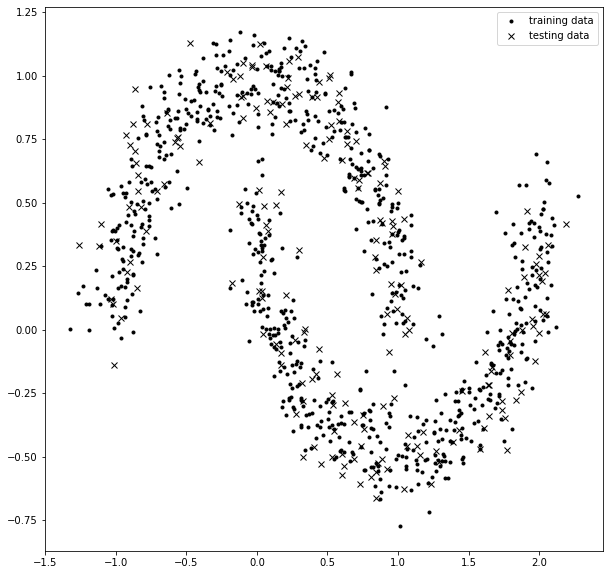

In [3]:
from matplotlib.pyplot import figure
import  numpy as np
fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(df.x, df.y, "k.", label="training data")
ax.plot(x_valid[:,0], x_valid[:,1], "kx", label = "testing data")
ax.legend()

### Encode targets and move to pytorch

In [4]:
import torch
x_train, y_train = torch.tensor(x_train), torch.tensor(y_train)
x_valid, y_valid = torch.tensor(x_valid), torch.tensor(y_valid)
#print(x_valid.shape, type(x_valid))

# encode the targets using one hot which is a part of the .nn.functional submodule read the docs for more info
y_train = torch.nn.functional.one_hot(y_train, num_classes=2)
y_valid = torch.nn.functional.one_hot(y_valid, num_classes=2)

### Forward Pass

In [5]:
#initialize the weights
torch.manual_seed(5) # seeding for reproducibility
w = torch.randn(size=(2, 2)) # randomly initialize the weights
w = w.to(torch.float64)
w.requires_grad = True # compute gradients with respect to a tensor during backpropagation
w.retain_grad() #PyTorch discards the gradients of tensors after the backward pass (during backpropagation) is finished, to save memory. However, sometimes we may want to keep the gradients of a tensor for further computations, such as when we want to compute higher-order gradients.


#same for the biases
b = torch.rand(size=(1,2))
#b = b.to(torch.float64)
b.requires_grad = True
b.retain_grad()
print(w.shape, b.shape)

torch.Size([2, 2]) torch.Size([1, 2])


In [6]:
def predict(x):
    a = x @ w.T + b
    return torch.softmax(a, dim=1)

In [24]:
"""y_hat = predict(torch.tensor([[1.0,1.0],[2.0,2.0]]))
y_hat"""


'y_hat = predict(torch.tensor([[1.0,1.0],[2.0,2.0]]))\ny_hat'

### Loss Function

In [7]:
def loss_fn(feature, target):
    prediction = predict(feature)
    return torch.mean(-(target*torch.log(prediction)).sum(dim=1))

### Optimization loop

In [8]:
EPOCHS = 1000
train_loss, valid_loss = [], []
DELTA = 0.1
for _ in range(EPOCHS):
    current_train_loss = loss_fn(x_train, y_train)
    current_train_loss.backward()
    train_loss.append(current_train_loss.data)
    with torch.no_grad():
        curr_valid_loss = loss_fn(x_valid, y_valid)
        valid_loss.append(curr_valid_loss.data)
        w -= DELTA * w.grad.data
        b -= DELTA * b.grad.data
        w.grad.zero_() # inplace
        b.grad.zero_()


### Learning Curves

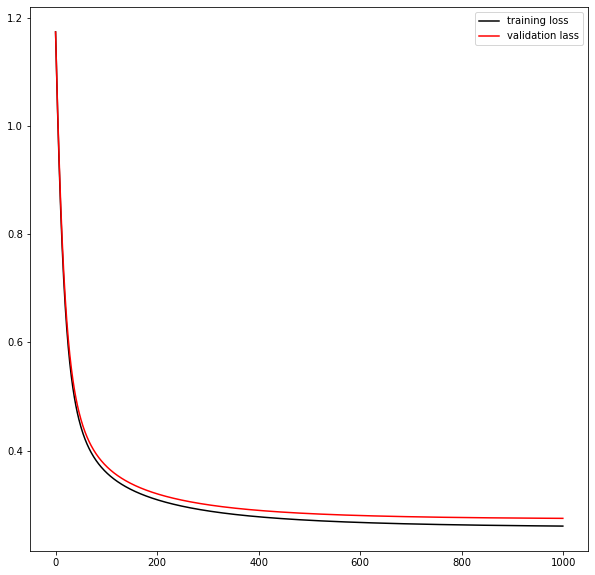

In [27]:
fig1 = figure(figsize=(10,10))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(train_loss, label="training loss", color="black")
ax1.plot(valid_loss, label="validation lass", color="red")
ax1.legend()

In [29]:
print(f"the loss difference between the means of  training and validation is : {abs(np.mean(train_loss) - np.mean(valid_loss))}")

the loss difference between the means of  training and validation is : 0.012539366459504542


### Visualizing the decision boundary

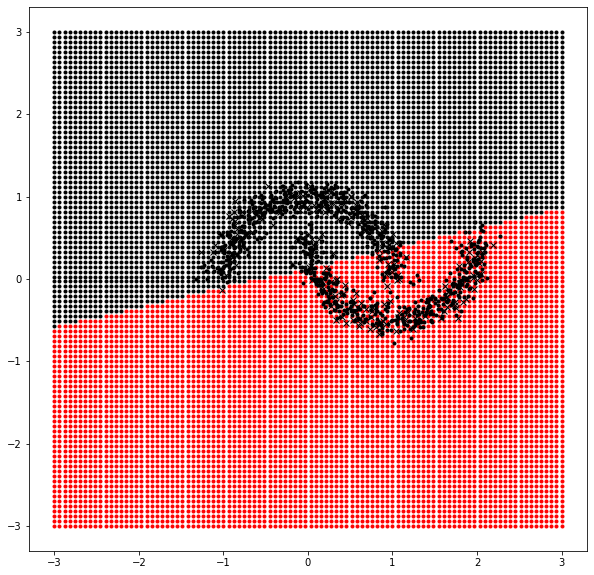

In [32]:
with torch.no_grad():
    x_0 = torch.linspace(-3,3,100).repeat(1,100).t()
    x_1 = torch.linspace(-3,3,100).repeat(100,1).t().reshape(-1,1)
    x = torch.hstack((x_0, x_1)).to(torch.double)
    x_plt = x.numpy()
    y_hat = predict(x)
    c_hat = torch.argmax(y_hat, dim=1)
    c_hat_plt = c_hat.numpy()

fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(x_plt[np.argwhere(c_hat_plt == 1),0], x_plt[np.argwhere(c_hat_plt == 1),1],"r.")
ax.plot(x_plt[np.argwhere(c_hat_plt == 0),0], x_plt[np.argwhere(c_hat_plt == 0),1],"k.")
ax.plot(df.x, df.y, "k.", label="training data")
ax.plot(x_valid[:,0], x_valid[:,1], "kx", label = "testing data")